# Initial exploratory plots

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('data_16-07_19_04.zip', compression = 'zip', low_memory = False)

In [31]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime', drop = True)

df.head()

,age_range,gender,involved_person,legislation,location,object_of_search,officer_defined_ethnicity,operation,operation_name,outcome,outcome_linked_to_object_of_search,outcome_object,removal_of_more_than_outer_clothing,self_defined_ethnicity,type,Force
datetime,,,,,,,,,,,,,,,,
2016-07-01 03:36:40+00:00,18-24,Female,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.472770', 'street': {'id': 545...",Controlled drugs,White,False,NaN,Suspect summonsed to court,NaN,"{'id': 'summonsed', 'name': 'Suspect summonsed...",False,White - White British (W1),Person search,avon-and-somerset
2016-07-01 03:36:40+00:00,18-24,Female,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.472770', 'street': {'id': 545...",Controlled drugs,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - White British (W1),Person search,avon-and-somerset
2016-07-01 03:36:40+00:00,18-24,Female,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.472770', 'street': {'id': 545...",Controlled drugs,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - White British (W1),Person search,avon-and-somerset
2016-07-01 05:20:55+00:00,10-17,Male,True,Police and Criminal Evidence Act 1984 (section 1),"{'latitude': '51.013992', 'street': {'id': 530...",Articles for use in criminal damage,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - White British (W1),Person search,avon-and-somerset
2016-07-01 07:21:51+00:00,25-34,Male,True,Police and Criminal Evidence Act 1984 (section 1),"{'latitude': '51.080631', 'street': {'id': 531...",Stolen goods,Other,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",True,Not Stated (NS),Person search,avon-and-somerset


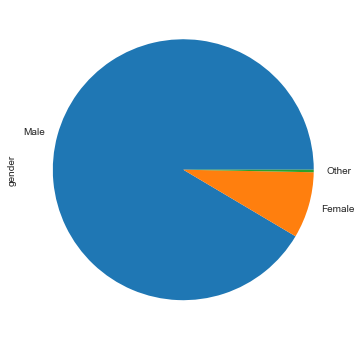

In [4]:
df['gender']\
    .value_counts()\
    .plot(kind = 'pie',
          figsize = (6, 6))

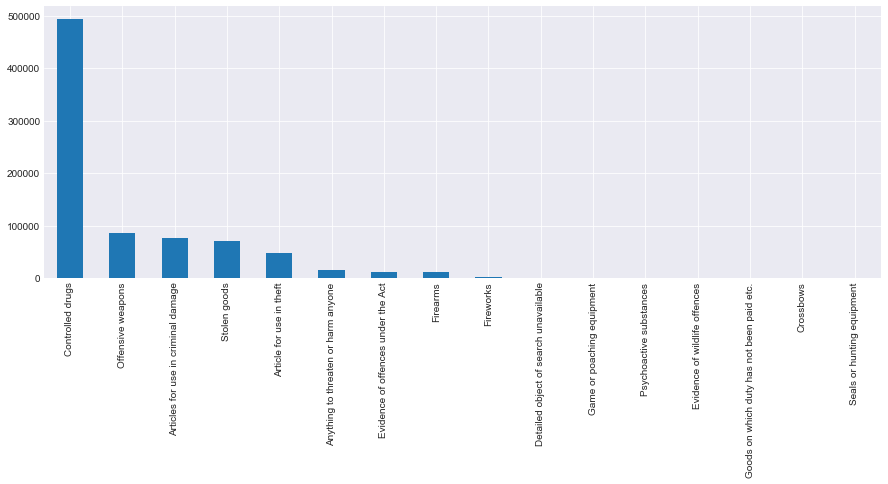

In [5]:
df['object_of_search']\
    .value_counts()\
    .plot(kind='bar',
          figsize = (15, 5))

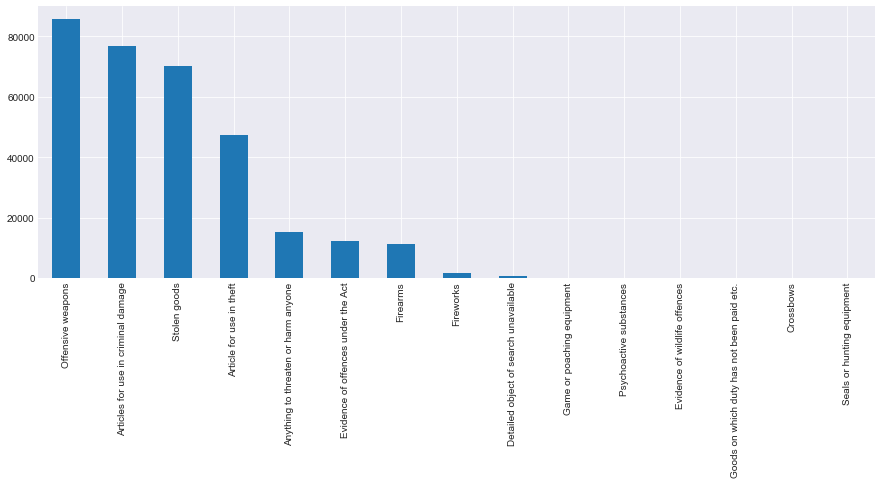

In [15]:
df_object = df[df['object_of_search'] != 'Controlled drugs']

df_object['object_of_search']\
    .value_counts()\
    .plot(kind='bar',
          figsize = (15, 5))

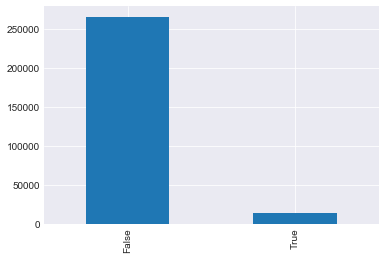

In [7]:
df['removal_of_more_than_outer_clothing'].value_counts().plot(kind='bar')

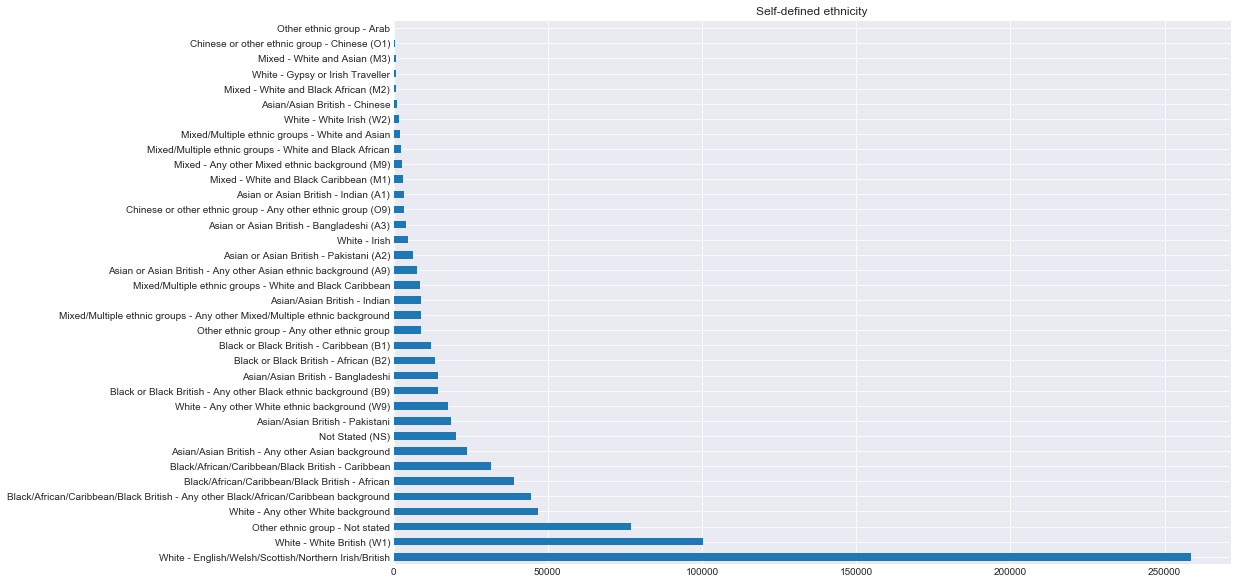

In [8]:
df['self_defined_ethnicity']\
    .value_counts()\
    .plot(kind='barh',
          figsize = (15, 10),
          title = 'Self-defined ethnicity')

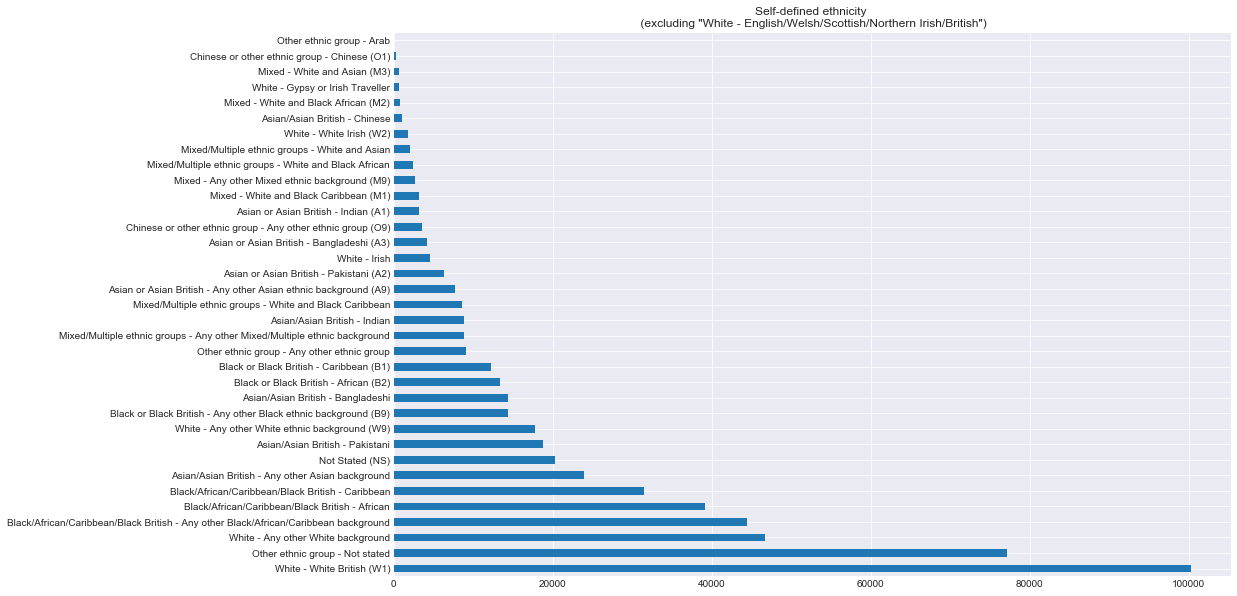

In [9]:
df_ethn = df[df['self_defined_ethnicity'] != 'White - English/Welsh/Scottish/Northern Irish/British']

df_ethn['self_defined_ethnicity']\
    .value_counts()\
    .plot(kind='barh',
          figsize = (15, 10),
          title = 'Self-defined ethnicity \n (excluding "White - English/Welsh/Scottish/Northern Irish/British")')

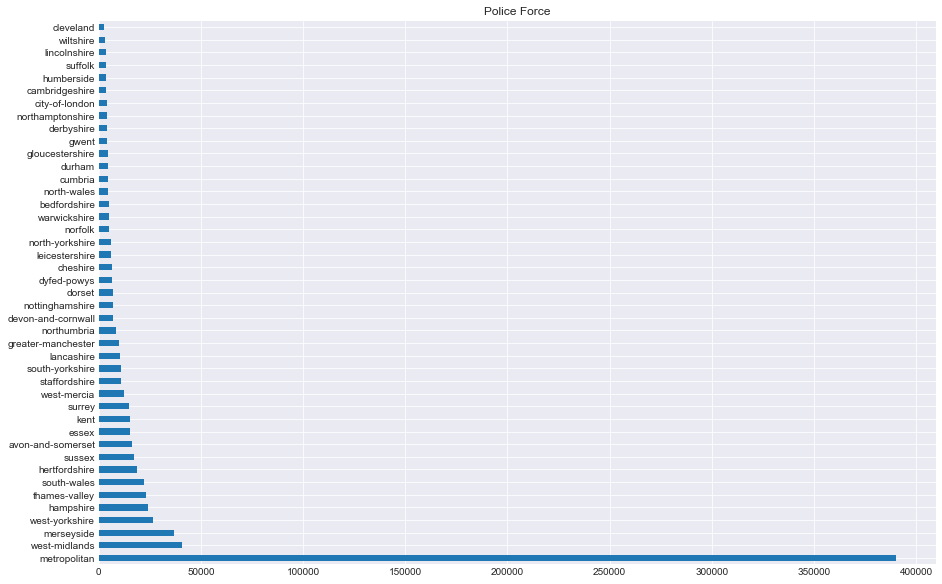

In [10]:
df['Force']\
    .value_counts()\
    .plot(kind='barh',
          figsize = (15, 10),
          title = 'Police Force')

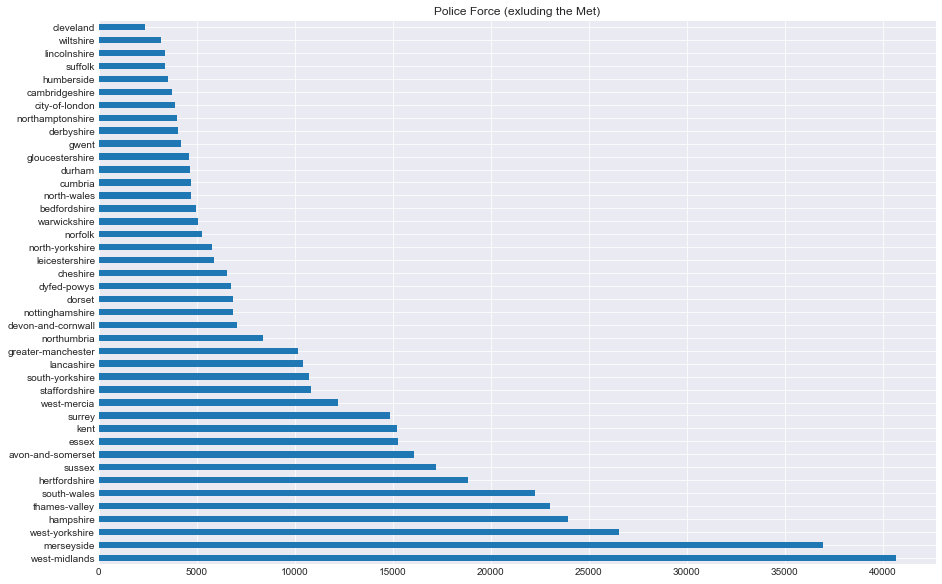

In [11]:
force_no_met = df[df['Force'] != 'metropolitan']

force_no_met['Force']\
    .value_counts()\
    .plot(kind='barh',
          figsize = (15, 10),
          title = 'Police Force (exluding the Met)')

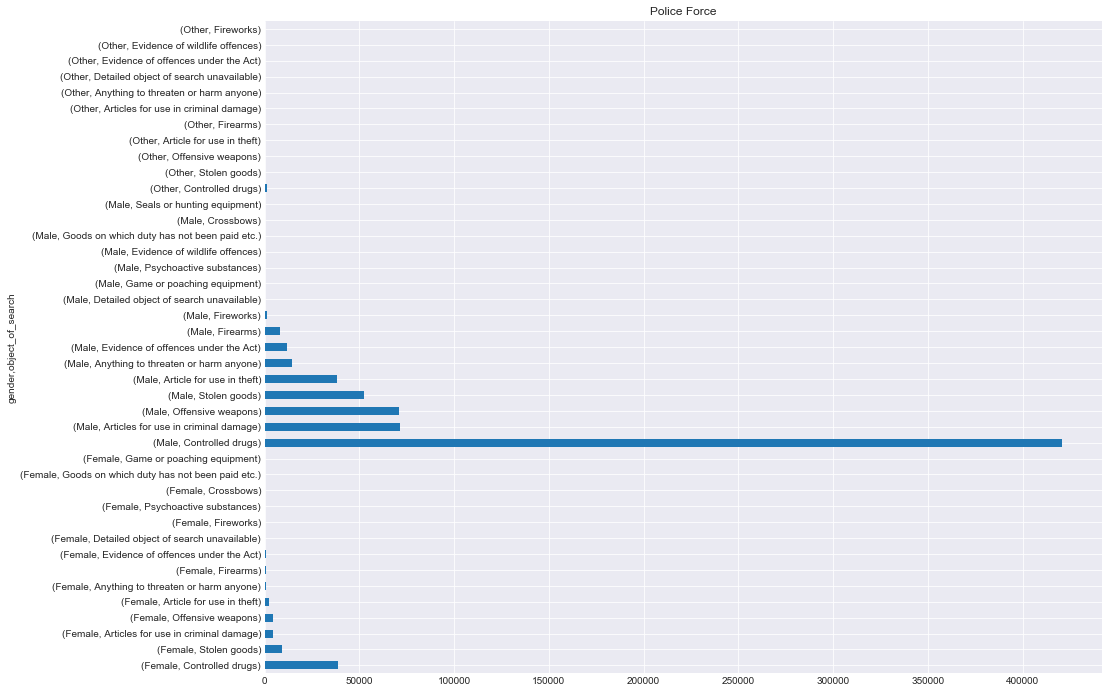

In [12]:
df_gender = df.groupby('gender')

df_gender['object_of_search']\
    .value_counts()\
    .plot(kind='barh',
          figsize = (15, 12),
          title = 'Police Force')

In [13]:
df_gender = df
pd.get_dummies(df_gender, columns = ['gender'])



,age_range,datetime,involved_person,legislation,location,object_of_search,officer_defined_ethnicity,operation,operation_name,outcome,outcome_linked_to_object_of_search,outcome_object,removal_of_more_than_outer_clothing,self_defined_ethnicity,type,Force,gender_Female,gender_Male,gender_Other
0,18-24,2016-07-01T03:36:40+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.472770', 'street': {'id': 545...",Controlled drugs,White,False,NaN,Suspect summonsed to court,NaN,"{'id': 'summonsed', 'name': 'Suspect summonsed...",False,White - White British (W1),Person search,avon-and-somerset,1,0,0
1,18-24,2016-07-01T03:36:40+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.472770', 'street': {'id': 545...",Controlled drugs,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - White British (W1),Person search,avon-and-somerset,1,0,0
2,18-24,2016-07-01T03:36:40+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.472770', 'street': {'id': 545...",Controlled drugs,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - White British (W1),Person search,avon-and-somerset,1,0,0
3,10-17,2016-07-01T05:20:55+00:00,True,Police and Criminal Evidence Act 1984 (section 1),"{'latitude': '51.013992', 'street': {'id': 530...",Articles for use in criminal damage,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - White British (W1),Person search,avon-and-somerset,0,1,0
4,25-34,2016-07-01T07:21:51+00:00,True,Police and Criminal Evidence Act 1984 (section 1),"{'latitude': '51.080631', 'street': {'id': 531...",Stolen goods,Other,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",True,Not Stated (NS),Person search,avon-and-somerset,0,1,0
5,25-34,2016-07-01T12:27:36+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.018373', 'street': {'id': 530...",Controlled drugs,White,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",NaN,White - White British (W1),Person search,avon-and-somerset,0,1,0
6,over 34,2016-07-01T12:27:36+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.018373', 'street': {'id': 530...",Controlled drugs,White,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",NaN,White - White British (W1),Person search,avon-and-somerset,0,1,0
7,25-34,2016-07-01T12:27:36+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.018373', 'street': {'id': 530...",Controlled drugs,White,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",NaN,White - Any other White ethnic background (W9),Person search,avon-and-somerset,0,1,0
8,25-34,2016-07-01T12:27:36+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.018373', 'street': {'id': 530...",Controlled drugs,White,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",NaN,White - White British (W1),Person search,avon-and-somerset,0,1,0
9,18-24,2016-07-01T15:52:16+00:00,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.410556', 'street': {'id': 540...",Controlled drugs,White,False,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",True,White - White British (W1),Person search,avon-and-somerset,0,1,0
